# Choose a Data Set

Create your own dataset by scraping one of the following websites *(level 5)*:
- [Wikipedia](https://www.wikipedia.org/)
- [OpenLibrary](https://openlibrary.org/)

**OR** 

Use data gathered from one of the following APIs *(level 4)*: 
- [TMDB](https://developer.themoviedb.org/reference/intro/getting-started)
- [College Scorecard](https://collegescorecard.ed.gov/data/api-documentation/)

**OR** 

Pick a JSON dataset *(level 3)*:
- [Food/Restaurant Data](https://drive.google.com/drive/folders/1V94S6WpclvQmbnW88KVMD4EruryA1oma?usp=drive_link)
- [Fashion Data](https://drive.google.com/drive/folders/1V8SbFjtRRW8WVf3xBzg0gzLjOtMhHea_?usp=drive_link)

**OR** 

Pick a CSV dataset *(level 2)*:
- [LA Parking Tickets](https://drive.google.com/drive/folders/1vaOfwMi6QmZEGsXr8VM0ulPGzvTTBCgm?usp=drive_link)
- [Hotels](https://drive.google.com/drive/folders/1IpVFxgwBJvJHKoOuBsk6WK2qYqFYP4hi?usp=drive_link)

# My Question
### If I select a random trending book, how many editions is it likely to have? 

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sns

In [2]:
df = pd.DataFrame(columns=['Editions'])
page = 2
while page <= 10:
    url = 'https://openlibrary.org/trending/forever?page='+ str(page)
    
    # Make a request to the website and check the status code
    response = requests.get(url)
    if response.status_code == 200:
        # Step 2: Parse the HTML content with BeautifulSoup
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Find all the h2 elements with the specific class
        mydivs = soup.find_all("span", class_="resultDetails")
        
        # Loop through each element and print the text
        for blueText in mydivs:
            step1 = blueText.get_text(strip=True).replace('First published in ', '', 1)
            year = step1[0:4]
            print(year)
            editions = step1[5: 7]
            print(editions)

            print(blueText.get_text(strip=True).replace('First published in ', '', 1)) # get_text() extracts the inner text, and strip() removes any extra whitespace

            new_row = {'Editions': editions}
            '''df = df._append(new_row, ignore_index=True)'''
            df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
        else:
            print(f"Error: Unable to retrieve the page, status code {response.status_code}")
    
    page += 1

2014
12
2014—12 editions
2020
9 
2020—9 editions
1963
11
1963—117 editions
2020
2 
2020—2 editions
1988
13
1988—132 editions
1949
43
1949—431 editions
2000
13
2000—138 editions
1998
27
1998—272 editions
2008
10
2008—105 editions
2007
12
2007—121 editions
1989
74
1989—74 editions
1813
40
1813—4035 editions
1900
93
1900—93 editions
2005
77
2005—77 editions
2005
11
2005—116 editions
2022
8 
2022—8 editions
1960
18
1960—187 editions
2018
16
2018—16 editions
1999
25
1999—259 editions
2017
17
2017—17 editions
Error: Unable to retrieve the page, status code 200
2019
20
2019—20 editions
2018
16
2018—16 editions
2011
39
2011—39 editions
2021
10
2021—10 editions
2011
33
2011—33 editions
1937
45
1937—457 editions
2022
10
2022—10 editions
1993
22
1993—223 editions
1901
20
1901—20 editions
2018
7 
2018—7 editions
1952
89
1952—89 editions
2018
25
2018—25 editions
2019
22
2019—22 editions
2020
4 
2020—4 editions
1952
14
1952—149 editions
1900
14
1900—1431 editions
2020
3 
2020—3 editions
2010
75
2010

In [3]:
print(df)

    Editions
0         12
1         9 
2         11
3         2 
4         13
..       ...
174       92
175       48
176       48
177       10
178       95

[179 rows x 1 columns]


In [4]:
df.info()
type(df.loc[0, "Editions"])
df["Editions"].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Editions  179 non-null    object
dtypes: object(1)
memory usage: 1.5+ KB


0      12
1       9
2      11
3       2
4      13
       ..
174    92
175    48
176    48
177    10
178    95
Name: Editions, Length: 179, dtype: int32

In [5]:
# Step 1: Convert to numeric, forcing non-numeric values to NaN
df["Editions"] = pd.to_numeric(df["Editions"], errors='coerce')

# Step 2: Drop rows where "Editions" is NaN
df = df.dropna(subset=["Editions"])

# Now you can safely compute mean, median, std, etc.
mean_value = df["Editions"].mean()
median_value = df["Editions"].median()
std_value = df["Editions"].std()


# My Answer

In [6]:
# Alternate between code for analysis and markdown descriptions of your analysis

In [7]:
df["Editions"].mean()

27.972067039106147

*** If I select a random trending book (all time), I would expect it to have approximately 27.972 editions because if I scape pages 2-10 of all-time trending books in  open library that is the mean amount of editions. *** (expected value calculation)

In [8]:
# Alternate between code for analysis and markdown descriptions of your analysis
# Add more code or markdown cells if needed to fully explain analysis

<AxesSubplot:xlabel='Editions', ylabel='Count'>

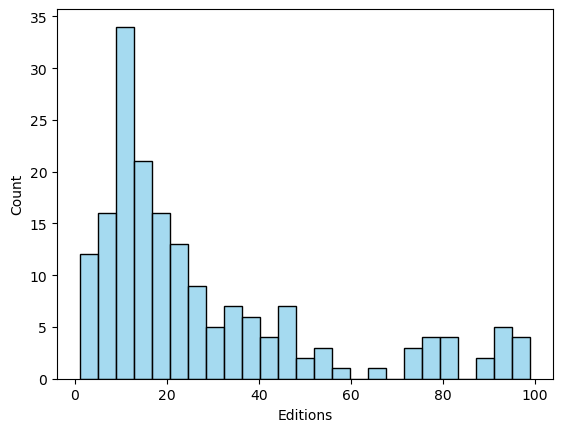

In [9]:
df["Editions"].std()
sns.histplot(df["Editions"], bins = 25, kde=False, color='skyblue')

In [12]:
summary = {
    "Max": df["Editions"].max(),
    "Q3": df["Editions"].quantile(0.75),
    "Median": df["Editions"].median(),
    "Q1": df["Editions"].quantile(0.25),
    "Min": df["Editions"].min()
}
summary

{'Max': 99, 'Q3': 37.0, 'Median': 18.0, 'Q1': 10.0, 'Min': 1}

*** However, the standard deviation is 25.625 which means that there is a lot of variance in the amount of editions trending books have and therefore this prediction of 27.972 would likely be very far off if I were to actually select a random trending book. For a normal distribrution, 68% of the data falls between one standard deviation of the mean which would mean that 68% of the data would fall between 2.347 and 53.59. *** (standard deviation) *** Unfornately, the data isn't normal but instead extremely skewed as we can see from the histogram. This means that this calculation isn't accurate. *** (histogram) *** A more useful/accurate measurement would be the quartiles. Using quartiles I found that 50% of the data falls between 10 and 37. This means that if I were to randomly select a trending book I would have a 50% chance of selecting a book with 37 or less editions and 10 or more editions. *** (theoretical probability)

In [10]:
# Add more code/markdown cells here if you need them.